<a href="https://colab.research.google.com/github/Ashutosh-Gairola/DEV/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UberDataset Analysis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import time,datetime
import warnings
warnings.filterwarnings('ignore')

### https://raw.githubusercontent.com/Ashutosh-Gairola/DEV/main/UberDataset.csv

DATASET link

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/Ashutosh-Gairola/DEV/main/UberDataset.csv")

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [12]:
# for bad coloum name
df.columns = df.columns.str.replace("*","")

In [13]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [5]:
df.info()  # give information about data dataframe,entries,Non null count and type of data
            # memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe() # describtion of numeric datatype

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [14]:
df.describe     # bounding frame of dataset

<bound method NDFrame.describe of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  

In [15]:
df.shape

(1156, 7)

In [16]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

# handle missing values

1. delete rows which is unnecesary(unrelatable,redundant data,unclear business logic,no statistical logic)

2. add bussiness logics if given

3. Impute MEAN,MEDIAN,MODE feature for numeric data and count of higher values  for categorical data



In [17]:
df.isnull()   # True means having null values

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [4]:
df.isna().sum()   # count the number of null value in each coloumn

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

<Axes: >

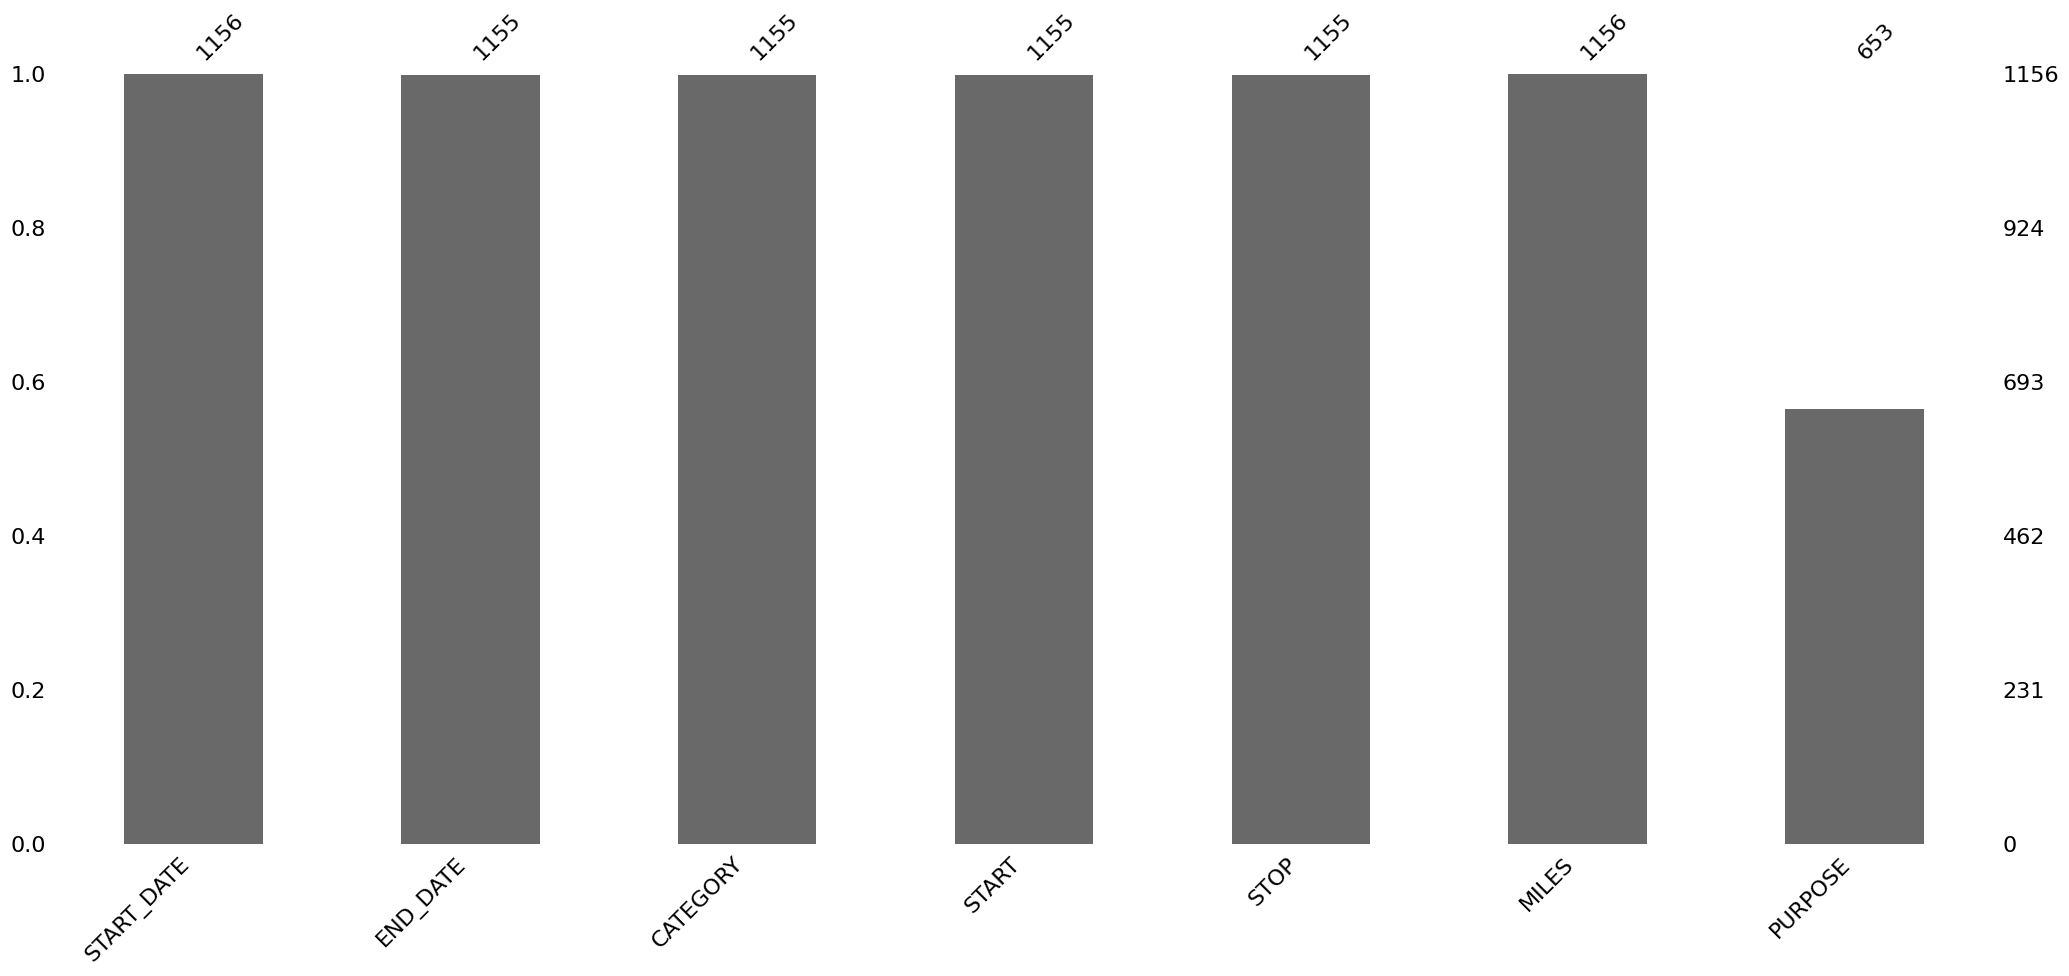

In [19]:
# to visualize the null and not null value
import missingno as msno
msno.bar(df)    # visualize the data count and value count

In [ ]:
msno.heatmap(df)

In [ ]:
msno.dendrogram(df)

In [22]:
# null coloum checking
null_column = df.columns[df.isnull().any()]

In [23]:
null_column

Index(['END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

In [26]:
df[null_column].isnull().sum()  #null value count

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [27]:
df.drop(index = 1155, axis=0, inplace=True)   # axis means removing whole row ,if axis=1 means column remove

In [28]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [29]:
df["PURPOSE"].isnull().sum()/len(df)  # percent to null values

0.43463203463203465

In [30]:
df["PURPOSE"].fillna(method='ffill',inplace=True)  # upervalue of null will be copied to null value
# forward fill method -> ffill

In [31]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [32]:
df.tail(20)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1135,12/29/2016 12:25,12/29/2016 12:33,Business,Kar?chi,Kar?chi,1.4,Errand/Supplies
1136,12/29/2016 13:17,12/29/2016 13:24,Business,Kar?chi,Kar?chi,1.1,Errand/Supplies
1137,12/29/2016 13:56,12/29/2016 14:11,Business,Kar?chi,Kar?chi,4.1,Airport/Travel
1138,12/29/2016 14:42,12/29/2016 14:58,Business,Kar?chi,Kar?chi,6.1,Between Offices
1139,12/29/2016 15:05,12/29/2016 15:16,Business,Kar?chi,Kar?chi,1.3,Errand/Supplies
1140,12/29/2016 18:59,12/29/2016 19:14,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain
1141,12/29/2016 19:50,12/29/2016 20:10,Business,Unknown Location,Kar?chi,4.1,Customer Visit
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Kar?chi,Kar?chi,7.2,Meeting
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,Meeting
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting


In [33]:
df["PURPOSE"].value_counts()   # data after fill the data

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [34]:
df.isnull().sum()   # no null values

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [37]:
# changing startdate and end date to date&time type
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')  # coerce means (not the date-time) it will handel string values

In [38]:
df.info() # start_date covert from object to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   object        
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 63.3+ KB


In [39]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [45]:
df.tail(20)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1135,2016-12-29 12:25:00,2016-12-29 12:33:00,Business,Kar?chi,Kar?chi,1.4,Errand/Supplies
1136,2016-12-29 13:17:00,2016-12-29 13:24:00,Business,Kar?chi,Kar?chi,1.1,Errand/Supplies
1137,2016-12-29 13:56:00,2016-12-29 14:11:00,Business,Kar?chi,Kar?chi,4.1,Airport/Travel
1138,2016-12-29 14:42:00,2016-12-29 14:58:00,Business,Kar?chi,Kar?chi,6.1,Between Offices
1139,2016-12-29 15:05:00,2016-12-29 15:16:00,Business,Kar?chi,Kar?chi,1.3,Errand/Supplies
1140,2016-12-29 18:59:00,2016-12-29 19:14:00,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain
1141,2016-12-29 19:50:00,2016-12-29 20:10:00,Business,Unknown Location,Kar?chi,4.1,Customer Visit
1142,2016-12-29 20:15:00,2016-12-29 20:45:00,Business,Kar?chi,Kar?chi,7.2,Meeting
1143,2016-12-29 20:53:00,2016-12-29 21:42:00,Business,Kar?chi,Unknown Location,6.4,Meeting
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting
